In [69]:
import pandas as pd
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


In [6]:
dataSet = pd.read_excel("c:/testData.xlsx")

In [7]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 22 columns):
Bar ID                      16635 non-null object
Date                        16635 non-null datetime64[ns]
Bar Segmentation            16635 non-null object
Beer Draught Volume (L)     16635 non-null float64
Beer Packaged Volume (L)    16635 non-null float64
Total Volume (L)            16635 non-null float64
Total Revenue               16635 non-null int64
Beer Revenue                16635 non-null int64
Beer Units                  16635 non-null int64
Spirits Revenue             16635 non-null int64
Spirits Units               16635 non-null int64
Food Revenue                16635 non-null int64
Non Alcoholic Revenue       16635 non-null int64
Wine Revenue                16635 non-null int64
Soju Revenue                16635 non-null int64
Soju Units                  16635 non-null int64
# Beer Orders               16635 non-null int64
# Beer & Food Orders        16635 non-nul

- column 명이 불편

In [8]:
dataSet.columns = ['barId', 'date', 'segment', 'draughtV', 'packagedV',
                   'totalV', 'totalR', 'beerR', 'beerU', 'spiritsR',
                   'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuR', 
                   'sojuU', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
                  'avgCheck', 'sojuP']

In [9]:
dataSet.head(10)

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,...,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,...,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,...,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,...,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,...,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,...,0,0,4500,1,7,7,1,1,28511.111111,4500.0
5,Bar 1,2017-07-06,"Food,Spirits",1.7,13.42,15.12,930200,169500,36,334500,...,44000,0,22500,4,12,11,2,4,35776.923077,5625.0
6,Bar 1,2017-07-07,"Food,Spirits",14.4,16.12,30.52,1457400,268000,49,491500,...,24000,0,31500,7,25,24,3,6,33122.727273,4500.0
7,Bar 1,2017-07-08,"Food,Spirits",13.5,3.50,17.00,717800,126500,20,219000,...,24000,0,4500,1,14,14,1,1,25635.714286,4500.0
8,Bar 1,2017-07-11,"Food,Spirits",4.4,9.66,14.06,736400,121000,24,300000,...,6000,0,54000,12,9,9,1,1,49093.333333,4500.0
9,Bar 1,2017-07-12,"Food,Spirits",3.2,3.00,6.20,287400,48500,8,113000,...,6000,0,45000,7,4,4,1,4,26127.272727,7875.0


In [10]:
dataSet.tail(10)

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,...,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
16625,Bar 147,2017-12-22,Food,35.6,2.64,38.24,1642811,254091,69,32728,...,43088,0,0,0,21,18,0,0,18668.306818,0.0
16626,Bar 147,2017-12-23,Food,44.9,0.66,45.56,1500898,294092,86,29090,...,39815,0,0,0,27,26,0,0,18529.604938,0.0
16627,Bar 147,2017-12-24,Food,31.6,5.61,37.21,2282252,275912,68,43634,...,55996,0,0,0,24,22,0,0,18405.258065,0.0
16628,Bar 147,2017-12-25,Food,22.7,0.00,22.70,1199176,141819,40,14545,...,37179,0,0,0,14,13,0,0,16889.802817,0.0
16629,Bar 147,2017-12-26,Food,21.7,0.66,22.36,939177,142730,40,65454,...,26817,0,0,0,13,13,0,0,18061.096154,0.0
16630,Bar 147,2017-12-27,Food,28.7,0.66,29.36,1204538,187728,54,83635,...,21817,0,0,0,15,15,0,0,19119.650794,0.0
16631,Bar 147,2017-12-28,Food,43.8,1.65,45.45,1403450,291820,77,58180,...,18180,0,0,0,22,22,0,0,23007.377049,0.0
16632,Bar 147,2017-12-29,Food,50.9,2.64,53.54,1688716,352273,103,80000,...,26816,0,0,0,17,17,0,0,19867.247059,0.0
16633,Bar 147,2017-12-30,Food,44.9,1.98,46.88,1577712,309546,91,36360,...,25361,0,0,0,20,19,0,0,19008.578313,0.0
16634,Bar 147,2017-12-31,Food,37.2,7.92,45.12,2478161,318639,89,54545,...,61176,0,0,0,28,27,0,0,17329.797203,0.0


In [11]:
dataSet.describe()

,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
count,16635.000000,16635.000000,16635.000000,1.663500e+04,1.663500e+04,16635.000000,1.663500e+04,16635.000000,1.663500e+04,1.663500e+04,1.663500e+04,1.663500e+04,16635.000000,16635.000000,16635.000000,16635.000000,16635.000000,1.663500e+04,16635.000000
mean,24.728442,5.741462,30.469905,1.310952e+06,3.454204e+05,66.086324,1.534546e+05,30.303396,7.615224e+05,3.044861e+04,4.796809e+03,7.916255e+04,18.059874,18.684521,17.260836,4.300631,7.316261,3.839092e+04,3328.277796
std,34.584824,7.825422,37.783568,1.693381e+06,4.248903e+05,75.728932,2.915427e+05,52.078989,1.252249e+06,8.803650e+04,3.455685e+04,1.211347e+05,26.865068,20.613945,18.756614,5.036225,9.188248,3.005361e+04,2140.576211
min,0.000000,-19.875000,-0.355000,-6.272700e+04,-1.512000e+05,-23.000000,-6.900000e+04,-12.000000,-6.545600e+04,0.000000e+00,0.000000e+00,-2.400000e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,-3.136350e+04,0.000000
25%,6.125000,1.000000,10.200000,5.303500e+05,1.080000e+05,23.000000,3.100000e+04,7.000000,2.634500e+05,4.000000e+03,0.000000e+00,8.000000e+03,2.000000,8.000000,7.000000,1.000000,1.000000,2.503842e+04,4000.000000
50%,16.000000,3.300000,21.150000,9.040000e+05,2.163730e+05,46.000000,7.000000e+04,15.000000,4.880000e+05,1.200000e+04,0.000000e+00,4.400000e+04,11.000000,14.000000,13.000000,3.000000,5.000000,3.414286e+04,4000.000000
75%,31.500000,7.255000,38.352500,1.502777e+06,4.100000e+05,85.000000,1.568500e+05,32.000000,8.853780e+05,2.800000e+04,0.000000e+00,1.000000e+05,24.000000,23.000000,22.000000,6.000000,10.000000,4.568182e+04,4000.000000
max,483.060000,126.720000,515.390000,4.666240e+07,4.452700e+06,1004.000000,5.468500e+06,834.000000,4.029460e+07,1.804500e+06,1.167000e+06,2.281500e+06,507.000000,283.000000,244.000000,86.000000,158.000000,2.687000e+06,25000.000000


In [12]:
dataSet.groupby('date', as_index=False)['barId'].count().sort_values('barId', ascending=False)

,date,barId
179,2017-12-27,146
172,2017-12-20,145
173,2017-12-21,143
180,2017-12-28,143
171,2017-12-19,143
146,2017-11-24,142
150,2017-11-28,141
181,2017-12-29,141
170,2017-12-18,141
174,2017-12-22,141


In [13]:
dataSet.groupby('barId', as_index=False)['date'].count().sort_values('date', ascending=False)

,barId,date
70,Bar 3,184
59,Bar 2,184
55,Bar 16,181
76,Bar 35,181
54,Bar 15,180
1,Bar 10,180
114,Bar 7,180
34,Bar 13,180
92,Bar 5,180
58,Bar 19,179


In [14]:
len(dataSet.date.unique())

184

- Only 2 stores with full data over the period
- Missing quite a few data by dates

> difficult to average to explain trends

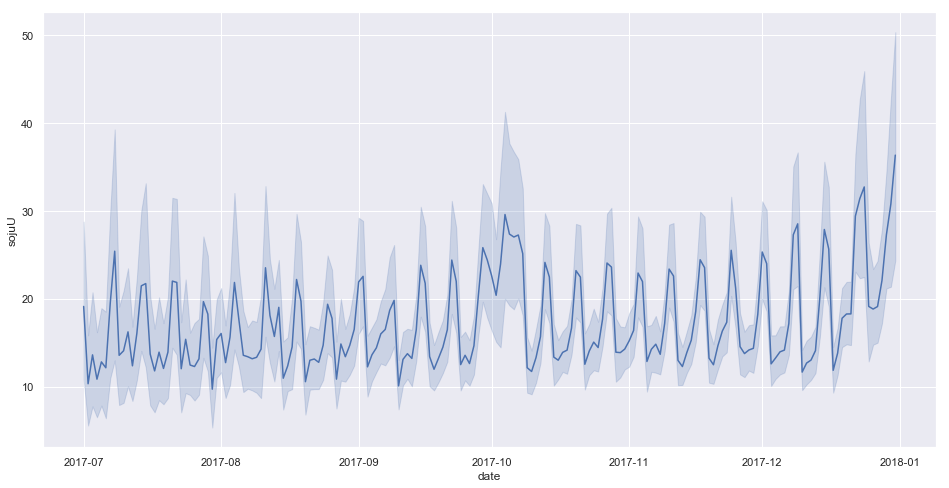

In [70]:
sns.lineplot(data=dataSet, x='date', y='sojuU', ci=95)

- can we really denote that soju demand is showing upward trend, increasing?

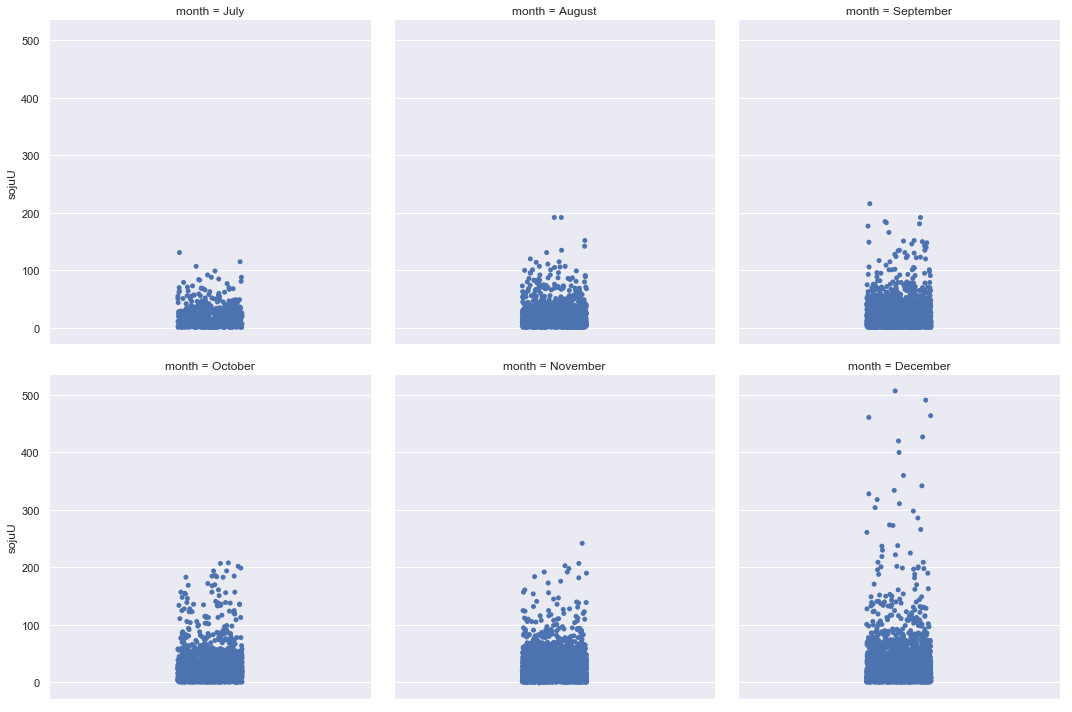

In [74]:
temp = dataSet[['date', 'sojuU']]
#temp = temp[temp.sojuU != 0 ]
temp['month'] = [d.month_name() for d in temp['date']]

sns.catplot(data=temp, y = 'sojuU', col='month', col_wrap=3)

In [78]:
temp = dataSet[['date', 'sojuU']]
#temp = temp[temp.sojuU != 0 ]
temp['month'] = [d.month_name() for d in temp['date']]
tempA = temp.groupby('month').mean()
tempB = temp.groupby('month').std()
temp = pd.merge(tempA, tempB, left_index=True, right_index=True)
temp.columns = ['mean', 'std']
temp = temp.iloc[[2,0,5,4,3,1],:]
temp

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mean,std
month,,
July,15.389016,18.318105
August,15.499198,20.288768
September,17.032939,22.748061
October,18.382925,25.553409
November,17.203021,22.790916
December,21.042725,36.232230


- The sales of soju had increased by 6 units/day on average in Dec. compared to Jul.
- However, the soju units sold in Dec. is still within 1std from average units sold in July.
- Also in Dec., the variation in soju units sold had widened significantly

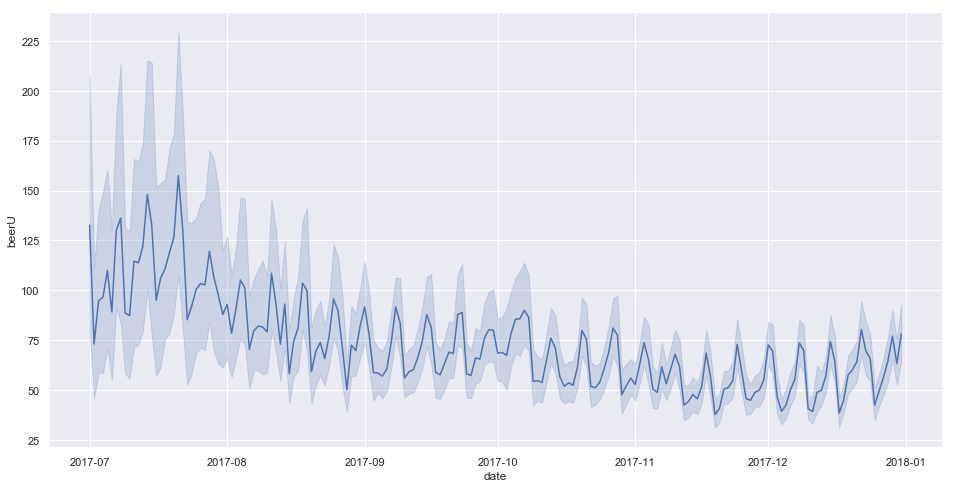

In [81]:
sns.lineplot(data=dataSet, x='date', y='beerU')

- Beer shows a downward trend, and **less fluctuation** (not good)

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


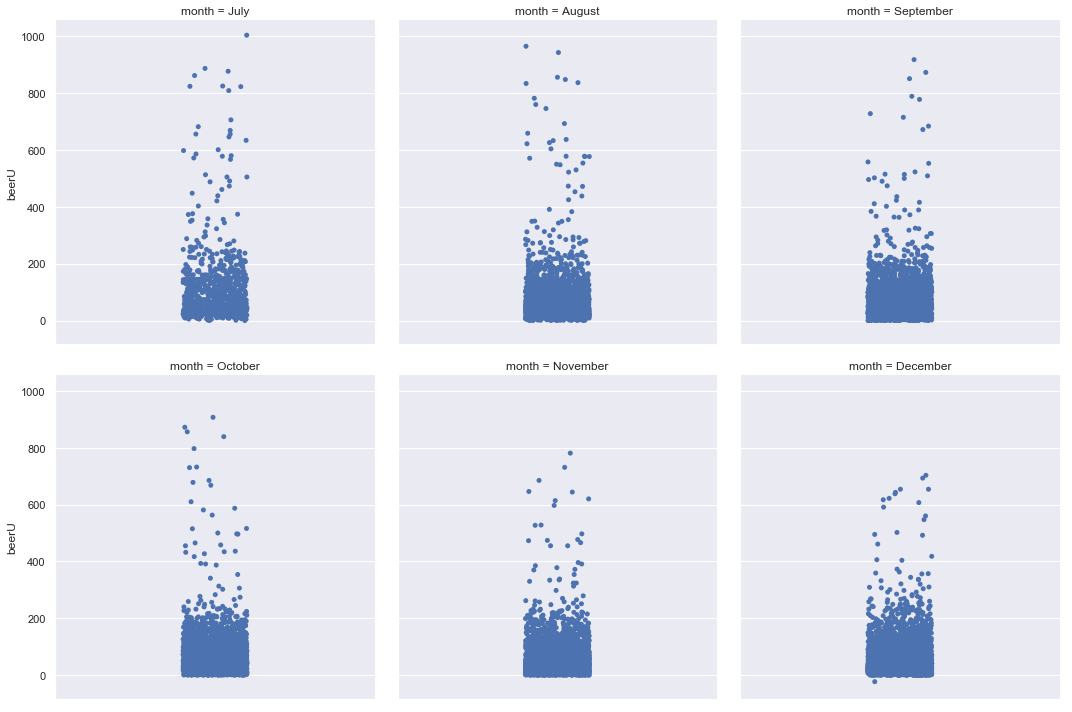

In [80]:
temp = dataSet[['date', 'beerU']]
temp['month'] = [d.month_name() for d in temp['date']]

sns.catplot(data=temp, y = 'beerU', col='month', col_wrap=3)

In [82]:
temp = dataSet[['date', 'beerU']]
#temp = temp[temp.sojuU != 0 ]
temp['month'] = [d.month_name() for d in temp['date']]
tempA = temp.groupby('month').mean()
tempB = temp.groupby('month').std()
temp = pd.merge(tempA, tempB, left_index=True, right_index=True)
temp.columns = ['mean', 'std']
temp = temp.iloc[[2,0,5,4,3,1],:]
temp

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mean,std
month,,
July,109.949657,127.784307
August,80.825762,95.144610
September,70.827905,75.716210
October,65.074388,71.730805
November,54.495392,58.723028
December,58.706543,62.453384


___
- assumption, less fluctuation may refer to closure of underperforming bars

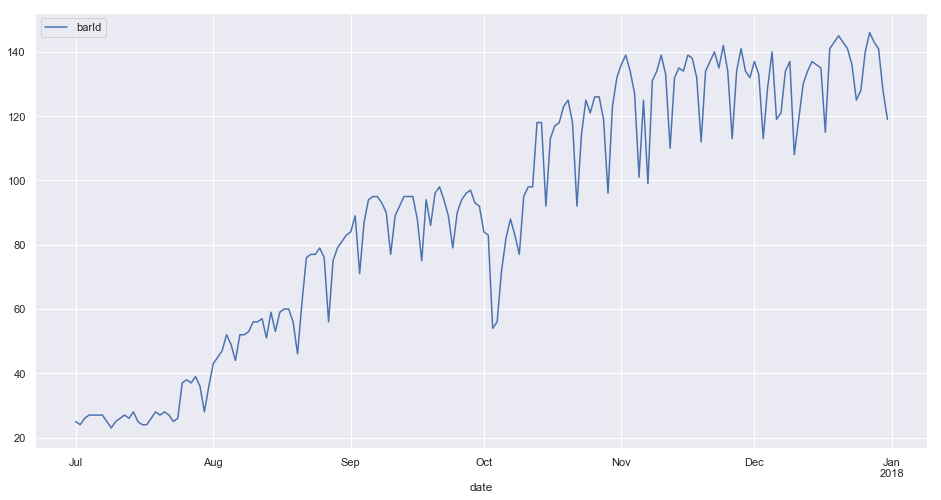

In [88]:
dataSet.groupby('date', as_index=False)['barId'].count().plot(x='date', y = 'barId')

- NOPE, getting more data reduces std

In [84]:
dataSet.groupby('barId')['beerU'].describe()

,count,mean,std,min,25%,50%,75%,max
barId,,,,,,,,
Bar 1,137.0,40.854015,38.118727,0.0,16.00,30.0,54.00,260.0
Bar 10,180.0,63.977778,21.516774,13.0,49.00,63.5,78.00,126.0
Bar 100,111.0,45.414414,19.262053,6.0,31.50,43.0,61.00,92.0
Bar 101,78.0,137.217949,48.918338,26.0,104.50,134.0,176.25,233.0
Bar 102,117.0,155.239316,69.654647,25.0,90.00,171.0,199.00,307.0
Bar 103,127.0,61.622047,27.407834,15.0,38.00,61.0,81.00,132.0
Bar 104,90.0,71.877778,31.515585,15.0,48.00,68.5,94.50,144.0
Bar 105,66.0,4.424242,5.516578,0.0,0.00,3.0,5.75,33.0
Bar 106,100.0,25.240000,13.032299,2.0,16.00,23.0,31.50,68.0


___

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


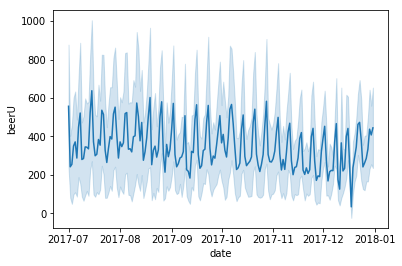

In [39]:
sns.lineplot(data=dataSet[dataSet.barId.isin(['Bar 2', 'Bar 3'])], x = 'date', y='beerU')

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


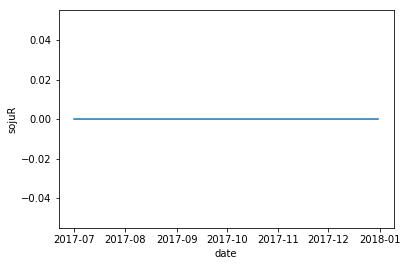

In [40]:
sns.lineplot(data=dataSet[dataSet.barId.isin(['Bar 2', 'Bar 3'])], x = 'date', y='sojuR')

In [52]:
dataSet.groupby('barId').apply(lambda x: x[['beerU', 'sojuU']].sum()).sort_values('beerU')

,beerU,sojuU
barId,,
Bar 121,187,0
Bar 105,292,560
Bar 131,548,0
Bar 72,587,27
Bar 124,651,572
Bar 145,670,0
Bar 87,729,675
Bar 143,758,0
Bar 113,838,69


- In the data, there is no bar without beer, but there are bars without soju 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002188B94B278>,
      dtype=object)

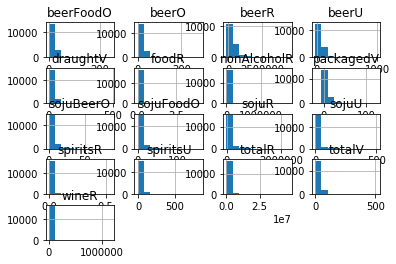

In [81]:
dataSet.iloc[:,3:-2].hist()